<a href="https://colab.research.google.com/github/akshay-121/SURP-Animal-species-detection-from-videos/blob/main/FastRCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow
from tensorflow.keras.applications import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from math import *
import glob
import os
import time
from tensorflow.keras import regularizers

In [ ]:
!gdown --id 1bszip6WF3LE8cAq2AtXX4abhcTSm_kYI

Downloading...
From: https://drive.google.com/uc?id=1bszip6WF3LE8cAq2AtXX4abhcTSm_kYI
To: /content/Dataset.zip
478MB [00:05, 81.3MB/s]


In [ ]:
!unzip "/content/Dataset.zip" -d "/content/"

Archive:  /content/Dataset.zip
   creating: /content/Dataset/
   creating: /content/Dataset/Bird/
   creating: /content/Dataset/Bird/images/
  inflating: /content/Dataset/Bird/images/00799bb8fd7dfc52.jpg  
  inflating: /content/Dataset/Bird/images/00d159d96abc5f86.jpg  
  inflating: /content/Dataset/Bird/images/00db930140fe5336.jpg  
  inflating: /content/Dataset/Bird/images/0105960ac33c5fc6.jpg  
  inflating: /content/Dataset/Bird/images/01b3055bb24580e8.jpg  
  inflating: /content/Dataset/Bird/images/04f216803f9b2528.jpg  
  inflating: /content/Dataset/Bird/images/0817e70f97cbd2e0.jpg  
  inflating: /content/Dataset/Bird/images/083156f402fb37e6.jpg  
  inflating: /content/Dataset/Bird/images/08924e24316622ff.jpg  
  inflating: /content/Dataset/Bird/images/0906b329c312fbf9.jpg  
  inflating: /content/Dataset/Bird/images/09d9f8377c1ac775.jpg  
  inflating: /content/Dataset/Bird/images/0a4eb4a0a14889ea.jpg  
  inflating: /content/Dataset/Bird/images/0c7e58071f3c75e2.jpg  
  inflating: /

In [ ]:
gt_boxes=[]
fmaps=[]
boxes=[]

In [ ]:
vgg=get_vgg()
xtrain=[]
ytrain=[]
for cat in ['Cat','Deer','Elephant','Bird','Fox']:
    for file in glob.glob('Dataset/'+cat+'/images/*.jpg'):
        f=open('Dataset/'+cat+'/finalLabels/'+os.path.basename(file)[:-4]+'.txt')
        lines=f.readlines()
        orggt_boxes=[]
        f.close()
        for line in lines:
            temp=line.split()
            xmin,ymin,xmax,ymax=list(map(int,map(float,temp[1:])))
            orggt_boxes.append([xmin,ymin,xmax-xmin,ymax-ymin])
        tic=time.time()
        proposals=get_proposals(file)
        toc=time.time()
        #print('time to get boxes -',toc-tic)
        boxes=proposals[0]
        tic=time.time()
        fmaps=get_feature_map(file,vgg)
        toc=time.time()
        #print('time to get vgg feature map -',toc-tic)
        gt_boxes=get_resized_boxes(file,orggt_boxes)
        for box in boxes:
            test=None
            for gt in gt_boxes:
                newbox=[box[0],box[1],box[0]+box[2],box[1]+box[3]]
                if iou(gt,newbox)>=0.5:
                    test=gt
            if test == None:
                continue
            tx=(test[0]-box[0])/box[2]
            ty=(test[1]-box[1])/box[3]
            tw=log(test[2]/box[2])
            th=log(test[3]/box[3])
            x,y,w,h=box/16.0
            x=int(x)
            y=int(y)
            w=int(w)
            h=int(h)
            fmap=fmaps[y:y+h,x:x+w,:]
            try:
                inpimg=tf.image.resize(fmap,(14,14))
            except:
                continue
            if cat=='Cat':
                cl=[1.0,0.0,0.0,0.0,0.0]
            elif cat=='Deer':
                cl=[0.0,1.0,0.0,0.0,0.0]
            elif cat=='Elephant':
                cl=[0.0,0.0,1.0,0.0,0.0]
            elif cat=='Fox':
                cl=[0.0,0.0,0.0,1.0,0.0]
            elif cat=='Bird':
                cl=[0.0,0.0,0.0,0.0,1.0]
            t_arr=np.array([tx,ty,tw,th])
            cl=np.array(cl)
            inpimg=np.array(inpimg)
            xtrain.append(inpimg)
            ytrain.append([t_arr,cl])
            #model.fit(x=inpimg,y=(t_arr,cl))


58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
np.shape(get_proposals('Zebra.jpg')[0][:128])

(128, 4)

In [ ]:
temp=get_proposals('Zebra.jpg')[0][:128]

In [ ]:
np.random.shuffle(temp)

In [ ]:
temp=temp[:64]

In [ ]:
vgg=get_vgg()

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg=get_vgg()
zebraxtrain=[]
zebraytrain=[]
for cat in ['Zebra']:
    for file in glob.glob('Dataset/'+cat+'/images/*.jpg')[:30]:
        f=open('Dataset/'+cat+'/finalLabels/'+os.path.basename(file)[:-4]+'.txt')
        lines=f.readlines()
        orggt_boxes=[]
        f.close()
        for line in lines:
            temp=line.split()
            xmin,ymin,xmax,ymax=list(map(int,map(float,temp[1:])))
            orggt_boxes.append([xmin,ymin,xmax-xmin,ymax-ymin])
        tic=time.time()
        proposals=get_proposals(file)
        #toc=time.time()
        #print('time to get boxes -',toc-tic)
        boxes=proposals[0][:128]
        np.random.shuffle(boxes)
        boxes=boxes[:64]
        #tic=time.time()
        fmaps=get_feature_map(file,vgg)
        toc=time.time()
        #print('time to get vgg feature map -',toc-tic)
        gt_boxes=get_resized_boxes(file,orggt_boxes)
        for box in boxes:
            test=None
            for gt in gt_boxes:
                newbox=[box[0],box[1],box[0]+box[2],box[1]+box[3]]
                if iou(gt,newbox)>=0.5:
                    test=gt
            if test == None:
                continue
            tx=(test[0]-box[0])/box[2]
            ty=(test[1]-box[1])/box[3]
            tw=log(test[2]/box[2])
            th=log(test[3]/box[3])
            x,y,w,h=box/16.0
            x=int(x)
            y=int(y)
            w=int(w)
            h=int(h)
            fmap=fmaps[y:y+h,x:x+w,:]
            try:
                inpimg=tf.image.resize(fmap,(14,14))
            except:
                continue
            if cat=='Cat':
                cl=[1.0,0.0,0.0,0.0,0.0,0.0]
            elif cat=='Deer':
                cl=[0.0,1.0,0.0,0.0,0.0,0.0]
            elif cat=='Elephant':
                cl=[0.0,0.0,1.0,0.0,0.0,0.0]
            elif cat=='Fox':
                cl=[0.0,0.0,0.0,1.0,0.0,0.0]
            elif cat=='Bird':
                cl=[0.0,0.0,0.0,0.0,1.0,0.0]
            elif cat=='Zebra':
                cl=[0.0,0.0,0.0,0.0,0.0,1.0]
            t_arr=np.array([tx,ty,tw,th])
            cl=np.array(cl)
            inpimg=np.array(inpimg)
            zebraxtrain.append(inpimg)
            zebraytrain.append([t_arr,cl])
            #model.fit(x=inpimg,y=(t_arr,cl))


In [ ]:
np.shape(xtrain)

(8741, 14, 14, 512)

In [ ]:
def iou(box_a,box_b):
    y1=max(box_a[1],box_b[1])
    y2=min(box_a[1]+box_a[3],box_b[1]+box_b[3])
    x1=max(box_a[0],box_b[0])
    x2=min(box_a[0]+box_a[2],box_b[0]+box_b[2])
    if y1>y2 or x1>x2:
        return 0                                                    #iou calculation
    inter_area=(x2-x1)*(y2-y1)
    union_area=box_a[2]*box_a[3]+box_b[2]*box_b[3]-inter_area
    if union_area == 0:
        return 0
    return inter_area/union_area


In [ ]:
!wget "https://github.com/opencv/opencv_extra/raw/master/testdata/cv/ximgproc/model.yml.gz"

--2021-08-05 15:38:46--  https://github.com/opencv/opencv_extra/raw/master/testdata/cv/ximgproc/model.yml.gz
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/cv/ximgproc/model.yml.gz [following]
--2021-08-05 15:38:47--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/cv/ximgproc/model.yml.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6390625 (6.1M) [application/octet-stream]
Saving to: ‘model.yml.gz’

model.yml.gz        100%[===================>]   6.09M  --.-KB/s    in 0.04s   

2021-08-05 15:38:47 (161 MB/s) - ‘model.yml.gz’ saved 

In [ ]:
def get_proposals(path):
    im=cv2.imread(path)
    im=cv2.resize(im,(800,800),cv2.INTER_AREA)
    im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    edge_detection = cv2.ximgproc.createStructuredEdgeDetection('model.yml.gz')
    edges = edge_detection.detectEdges(np.float32(im) / 255.0)
    orimap = edge_detection.computeOrientation(edges)
    edges = edge_detection.edgesNms(edges, orimap)
    edge_boxes = cv2.ximgproc.createEdgeBoxes()
    edge_boxes.setMaxBoxes(64)
    boxes = edge_boxes.getBoundingBoxes(edges, orimap)
    return boxes


In [ ]:
def get_feature_map(path,model):
    im=tf.keras.preprocessing.image.load_img(path=path,target_size=(800,800))
    im = tf.keras.preprocessing.image.img_to_array(im)
    im=tf.keras.applications.vgg16.preprocess_input(im)
    #im=cv2.resize(im,(800,800),interpolation=cv2.INTER_AREA)
    im=np.reshape(im,(1,800,800,3))
    pred=model.predict(im)[0]
    return pred

In [ ]:
def get_vgg():
    m=VGG16(include_top=False,input_shape=(800,800,3))
    x=Input((800,800,3))
    inp=x
    for layer in m.layers:
        if layer.__class__.__name__=='InputLayer':
            continue
        if layer.output_shape[1]>=50:
            x=layer(x)
    model=Model(inp,x)
    model.trainable=False
    return model

In [ ]:
def get_resized_boxes(path,original_boxes):
    temp=cv2.imread(path)
    gt_boxes=[]
    width,height=len(temp[0]),len(temp)
    temp=cv2.resize(temp,(800,800),interpolation=cv2.INTER_AREA)
    for gt in original_boxes:
        x,y,w,h=list(map(int,gt))
        x=int(x*(800.0/width))
        y=int(y*(800.0/height))
        w=int(w*(800.0/width))
        h=int(h*(800.0/height))
        #print(x,y,w,h)
        gt_boxes.append([x,y,w,h])
    return gt_boxes


In [ ]:
def get_fastrcnn():
    y=Input((14,14,512))
    y_inp=y
    y=MaxPool2D(2)(y)
    y=Flatten()(y)
    y=Dense(1024)(y)
    y=Dropout(0.25)(y)
    y=Dense(1024)(y)
    y=Dropout(0.25)(y)
    y=Dense(512)(y)
    y=Dropout(0.25)(y)
    y=Dense(1024,name='logits')(y)
    reg=Dense(4,activity_regularizer=regularizers.l2(1e-1),name='regression_layer')(y)
    cls=Dense(5,name='class_layer')(y)
    cls=Softmax()(cls)
    fastrcnn=Model(inputs=y_inp,outputs=[reg,cls])
    return fastrcnn

In [ ]:
zebraxx=np.array(zebraxtrain)

In [ ]:
tempxx=np.array(tempx)

In [ ]:
tempyyy=np.concatenate((tempy,zebraytrain))

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
tempxxx=np.concatenate((zebraxx,tempxx))

In [ ]:
fastrcnn=get_fastrcnn()
fastrcnn.compile(optimizer='adam',loss=['mse','categorical_crossentropy'],loss_weights=[10.0,1.0])
fastrcnn.load_weights('drive/MyDrive/fastrcnn.h5')

In [ ]:
temp_fastrcnn=get_fastrcnn()
temp_fastrcnn.load_weights('drive/MyDrive/fastrcnn.h5')
fastrcnn.compile(optimizer='adam',loss=['mse','categorical_crossentropy'],loss_weights=[10.0,1.0])


In [ ]:
temp_fastrcnn.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 14, 14, 512) 0                                            
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 7, 7, 512)    0           input_5[0][0]                    
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 25088)        0           max_pooling2d_2[0][0]            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 1024)         25691136    flatten_2[0][0]                  
____________________________________________________________________________________________

In [ ]:
from datetime import datetime
from packaging import version
temp_fastrcnn=get_fastrcnn()
temp_fastrcnn.load_weights('drive/MyDrive/fastrcnn.h5')
fastrcnn.compile(optimizer='adam',loss=['mse','categorical_crossentropy'],loss_weights=[10.0,1.0])

f=Input((14,14,512))
new_inp=f
for layer in temp_fastrcnn.layers:
    if layer.__class__.__name__=='InputLayer':
        continue
    if layer.name=='logits':
        f=layer(f)
        break
    f=layer(f)
reg2=temp_fastrcnn.get_layer('regression_layer')(f)
class2=Dense(1,kernel_initializer='random_normal',bias_initializer='zeros',activation='sigmoid',activity_regularizer=regularizers.l1_l2(),bias_regularizer=regularizers.l2(1e-2))(f)
oldcls=temp_fastrcnn.get_layer('class_layer')(f)
logit_cls=oldcls
cls2=Concatenate()([oldcls,class2])
cls2=Softmax()(cls2)
new_model=Model(inputs=new_inp,outputs=[reg2,cls2,logit_cls,reg2])
new_model.compile(optimizer='adam',loss=['mse','categorical_crossentropy','mse','mse'],loss_weights=[0.0,0.0,1000.0,1.0])
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
np.shape(zebray1)

(2435, 4)

In [ ]:
np.shape(zebray2)

(2679, 6)

In [ ]:
np.shape(tempxxx)

(2679, 14, 14, 512)

In [ ]:
np.shape(temp_out[0])

(2679, 5)

In [ ]:
fastrcnn.trainable=False

In [ ]:
zebray1=[]
zebray2=[]
for temp in tempyyy:
    zebray1.append(temp[0])
    zebray2.append(temp[1])
zebray1=np.array(zebray1)
zebray2=np.array(zebray2)
zebraxx=np.array(zebraxtrain)
temp_model=Model(fastrcnn.inputs,outputs=[fastrcnn.get_layer('class_layer').output,fastrcnn.get_layer('regression_layer').output])
temp_out=temp_model.predict(tempxxx)

In [ ]:
fastrcnn.trainable=False
hist2=new_model.fit(x=tempxxx,y=[zebray1,zebray2,temp_out[0],temp_out[1]],batch_size=102,epochs=25)

Epoch 1/25
24/24 [==============================] - 2s 20ms/step - loss: 77210312.0000 - regression_layer_loss: 418.6797 - softmax_43_loss: 88.9773 - class_layer_loss: 77209.7344 - regression_layer_1_loss: 418.3900
Epoch 2/25
24/24 [==============================] - 0s 20ms/step - loss: 3519651.5000 - regression_layer_loss: 241.1493 - softmax_43_loss: 34.1890 - class_layer_loss: 3519.3142 - regression_layer_1_loss: 241.3016
Epoch 3/25
24/24 [==============================] - 0s 20ms/step - loss: 1518659.3750 - regression_layer_loss: 106.2872 - softmax_43_loss: 21.8527 - class_layer_loss: 1518.5110 - regression_layer_1_loss: 106.0382
Epoch 4/25
24/24 [==============================] - 0s 20ms/step - loss: 893563.7500 - regression_layer_loss: 45.3529 - softmax_43_loss: 16.3470 - class_layer_loss: 893.5004 - regression_layer_1_loss: 45.1749
Epoch 5/25
24/24 [==============================] - 0s 20ms/step - loss: 494625.8438 - regression_layer_loss: 23.0040 - softmax_43_loss: 12.2670 - cla

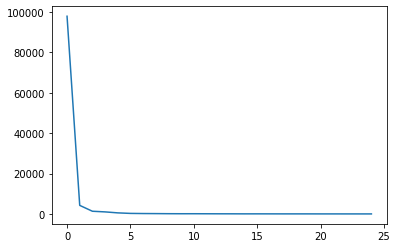

In [ ]:
plt.plot(hist2.history['loss'])
plt.show()

In [ ]:
def call2(imgfile):
    proposals=get_proposals(imgfile)
    fmapss=get_feature_map(imgfile,vgg)
    res=[]
    for b in proposals[0]:
        x,y,w,h=b/16.0
        x=int(x)
        y=int(y)
        w=int(w)
        h=int(h)
        if w<=0 or h<=0:
            res.append([None])
            continue
        f=fmapss[y:y+h,x:x+w,:]
        inpimg=tf.image.resize(f,(14,14))
        inpimg=np.array(inpimg)
        inpimg=inpimg.reshape((1,14,14,512))
        res.append(new_model.predict(inpimg)[:2])
    predictions=[]
    fboxes=[]
    for i in range(len(proposals[0])):
        if res[i]==[None]:
            continue
        x=int(proposals[0][i][0]+proposals[0][i][2]*res[i][0][0][0])
        y=int(proposals[0][i][1]+proposals[0][i][3]*res[i][0][0][1])
        w=int(proposals[0][i][2]*exp(res[i][0][0][2]))
        h=int(proposals[0][i][3]*exp(res[i][0][0][3]))
        tt=[x,y,w,h,res[i][1][0]]
        predictions.append(tt)
    predictions=sorted(predictions,key=lambda x:np.argmax(x[4]),reverse=True)
    bad=[]
    #print(predictions)
    for i in range(len(predictions)):
        if i in bad:
            continue
        x,y,w,h=predictions[i][:4]
        for j in range(i+1,len(predictions)):
            x1,y1,w1,h1=predictions[j][:4]
            iou_val=iou([x,y,w+x,y+h],[x1,y1,x1+w1,y1+h1])
           # print(iou_val)
            if iou_val>=0.5:
                bad.append(j)
        fboxes.append(predictions[i])

    im=cv2.imread(imgfile)
    im=cv2.resize(im,(800,800),interpolation=cv2.INTER_AREA)
    for temp in fboxes:
        if max(temp[4])<0.6:
            continue
        x,y,w,h=temp[:4]
        #print(x,y,w,h)
        if x+w>2500 or y+h>2500:
            continue
        cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),1)
        text=str(temp[4].argmax())
        if text=='0':
            text='cat'
        if text=='1':
            text='deer'
        if text=='2':
            text='elephant'
        if text=='3':
            text='Fox'
        if text=='4':
            text='Bird'
        if text=='5':
            text='Zebra'
        cv2.putText(im,text,(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),1)
    cv2_imshow(im)


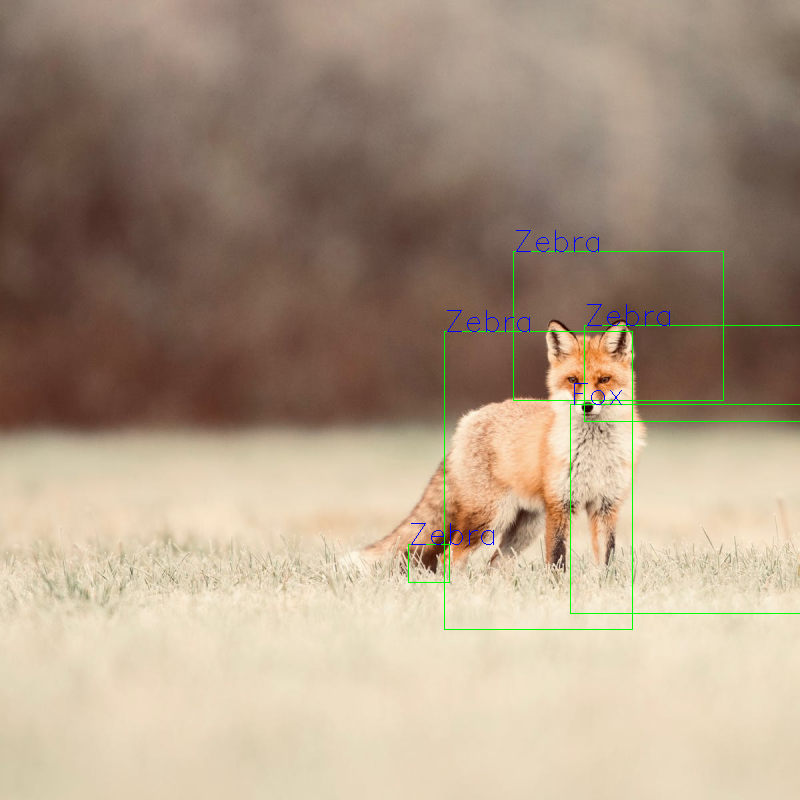

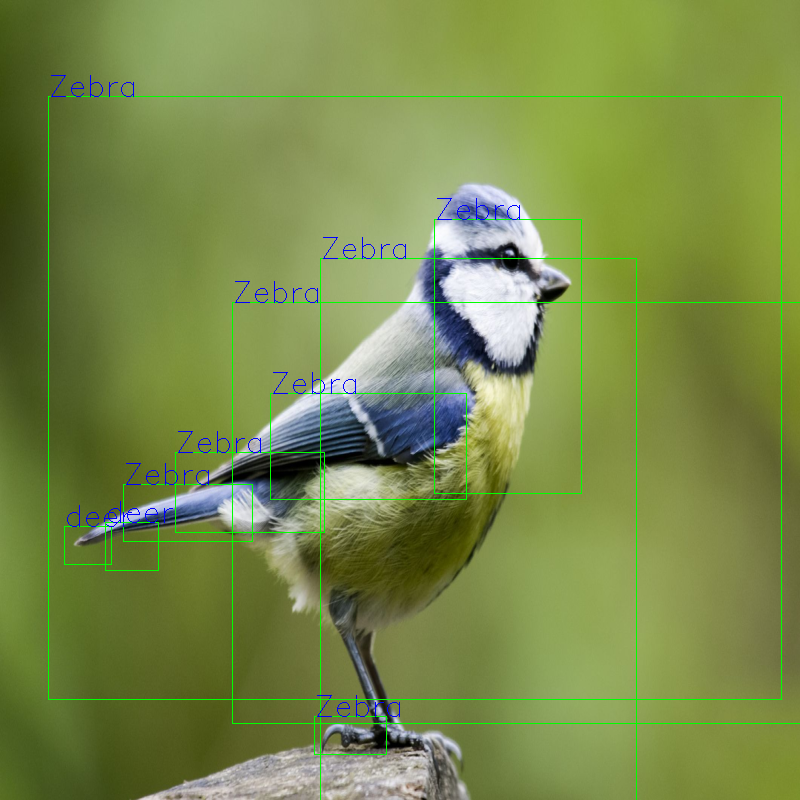

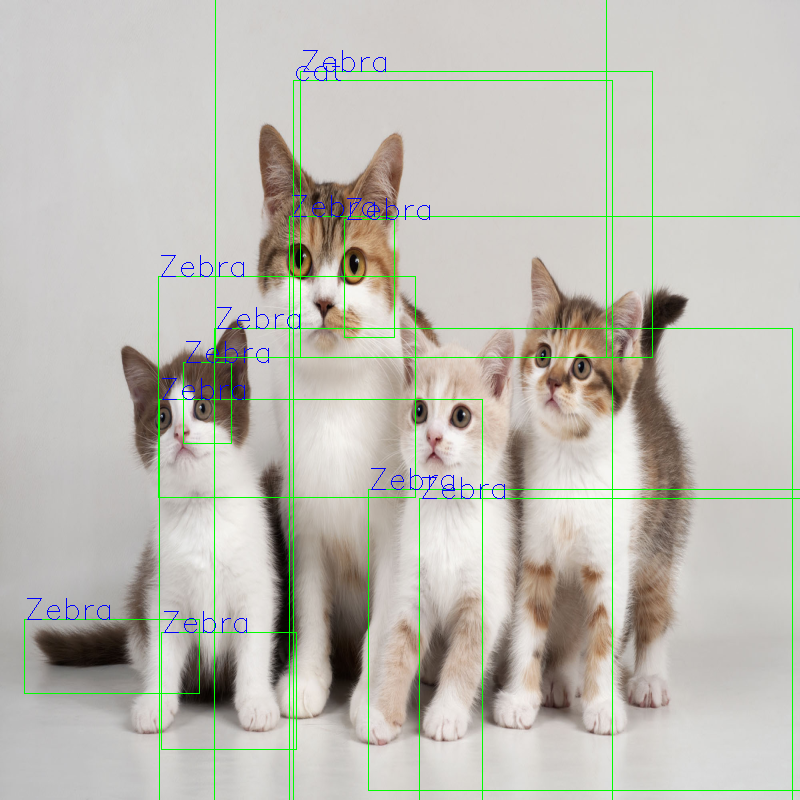

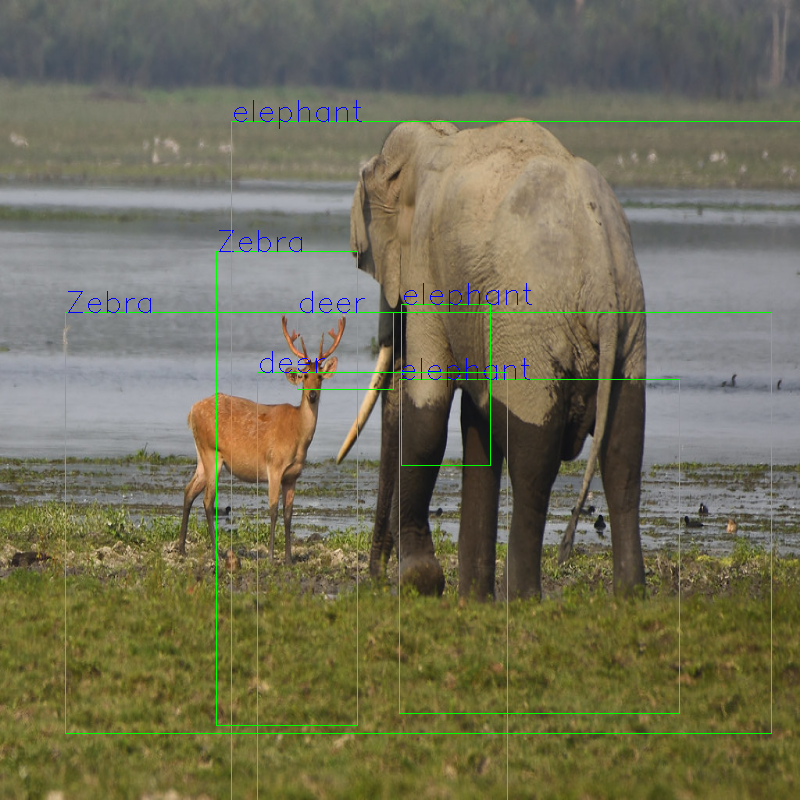

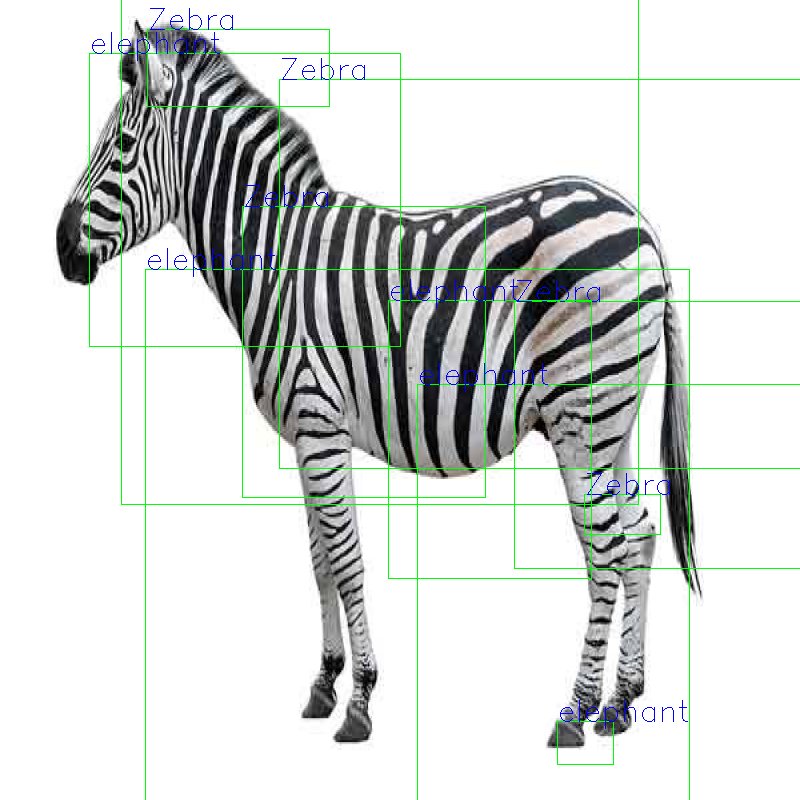

In [ ]:
call2('f.jpg')
call2('b.jpg')
call2('cats.jpg')
call2('kk.jpg')
call2('Zebra.jpg')

In [ ]:
y1=[]
y2=[]
for temp in ytrain:
    y1.append(temp[0])
    y2.append(temp[1])
y1=np.array(y1)
y2=np.array(y2)
xx=np.array(xtrain)

In [ ]:
fastrcnn.trainable=True
hist=fastrcnn.fit(x=xx,y=[y1,y2],batch_size=400,epochs=20)

Epoch 1/20
22/22 [==============================] - 1s 62ms/step - loss: 70.2307 - regression_layer_loss: 6.6648 - softmax_10_loss: 0.9262
Epoch 2/20
22/22 [==============================] - 1s 63ms/step - loss: 64.9809 - regression_layer_loss: 6.1654 - softmax_10_loss: 0.8749
Epoch 3/20
22/22 [==============================] - 1s 63ms/step - loss: 57.9535 - regression_layer_loss: 5.4871 - softmax_10_loss: 0.9048
Epoch 4/20
22/22 [==============================] - 1s 64ms/step - loss: 50.3609 - regression_layer_loss: 4.7569 - softmax_10_loss: 0.9125
Epoch 5/20
22/22 [==============================] - 1s 64ms/step - loss: 46.5859 - regression_layer_loss: 4.3984 - softmax_10_loss: 0.8654
Epoch 6/20
22/22 [==============================] - 1s 64ms/step - loss: 39.7137 - regression_layer_loss: 3.7377 - softmax_10_loss: 0.8527
Epoch 7/20
22/22 [==============================] - 1s 64ms/step - loss: 36.3188 - regression_layer_loss: 3.4101 - softmax_10_loss: 0.8793
Epoch 8/20
22/22 [=========

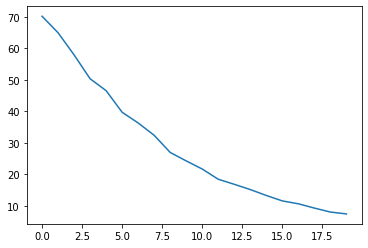

In [ ]:
plt.plot(hist.history['loss'])
plt.show()

[151, 298, 103, 398, array([1.0000000e+00, 9.2068061e-17, 1.1216770e-25, 4.3519709e-11,
       1.3690289e-16], dtype=float32)]
[37, 257, 424, 409, array([9.9999976e-01, 3.2192221e-11, 9.0884309e-19, 2.6318116e-07,
       1.7832989e-10], dtype=float32)]
[27, 97, 961, 673, array([9.9999964e-01, 3.4718659e-10, 1.0184824e-12, 3.3896703e-07,
       1.9722355e-09], dtype=float32)]


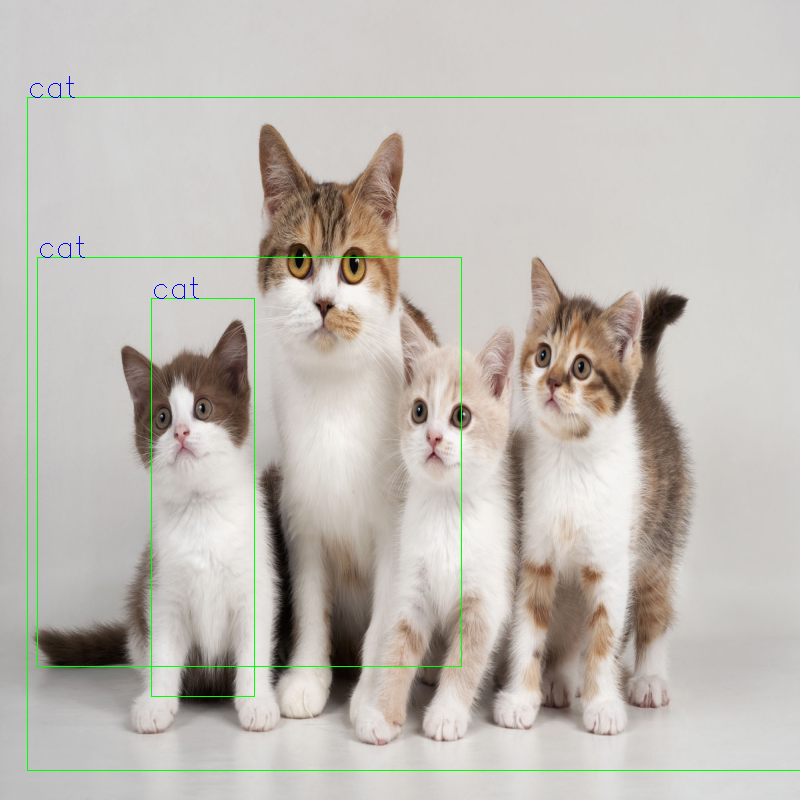

In [ ]:
def call(imgfile):
    proposals=get_proposals(imgfile)
    fmapss=get_feature_map(imgfile,vgg)
    res=[]
    for b in proposals[0]:
        x,y,w,h=b/16.0
        x=int(x)
        y=int(y)
        w=int(w)
        h=int(h)
        if w<=0 or h<=0:
            res.append([None])
            continue
        f=fmapss[y:y+h,x:x+w,:]
        inpimg=tf.image.resize(f,(14,14))
        inpimg=np.array(inpimg)
        inpimg=inpimg.reshape((1,14,14,512))
        res.append(fastrcnn.predict(inpimg))
    predictions=[]
    fboxes=[]
    for i in range(len(proposals[0])):
        if res[i]==[None]:
            continue
        x=int(proposals[0][i][0]+proposals[0][i][2]*res[i][0][0][0])
        y=int(proposals[0][i][1]+proposals[0][i][3]*res[i][0][0][1])
        w=int(proposals[0][i][2]*exp(res[i][0][0][2]))
        h=int(proposals[0][i][3]*exp(res[i][0][0][3]))
        tt=[x,y,w,h,res[i][1][0]]
        predictions.append(tt)
    predictions=sorted(predictions,key=lambda x:np.argmax(x[4]),reverse=True)
    bad=[]
    #print(predictions)
    for i in range(len(predictions)):
        if i in bad:
            continue
        x,y,w,h=predictions[i][:4]
        for j in range(i+1,len(predictions)):
            x1,y1,w1,h1=predictions[j][:4]
            iou_val=iou([x,y,w+x,y+h],[x1,y1,x1+w1,y1+h1])
           # print(iou_val)
            if iou_val>=0.5:
                bad.append(j)
        fboxes.append(predictions[i])
    #print(fboxes)
    fboxes=sorted(fboxes,key=lambda x:max(x[4]),reverse=True)
    fboxes=fboxes[:3]
    #print('#####################################################')
    #print(fboxes)
    #print(len(fboxes))
    im=cv2.imread(imgfile)
    im=cv2.resize(im,(800,800),interpolation=cv2.INTER_AREA)
    for temp in fboxes:
        if max(temp[4])<0.6:
            continue
        x,y,w,h=temp[:4]
        #print(x,y,w,h)
        if x+w>2500 or y+h>2500:
            continue
        print(temp)
        cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),1)
        text=str(temp[4].argmax())
        if text=='0':
            text='cat'
        if text=='1':
            text='deer'
        if text=='2':
            text='elephant'
        if text=='3':
            text='Fox'
        if text=='4':
            text='Bird'
        cv2.putText(im,text,(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),1)
    cv2_imshow(im)
call('cats.jpg')

[[225, 701, 70, 25, array([4.8906319e-03, 2.0123208e-01, 1.2473759e-01, 3.3604298e-05,
       6.6910613e-01], dtype=float32)], [452, 260, 193, 553, array([4.1775897e-01, 3.9506722e-06, 3.4818828e-10, 5.8223706e-01,
       4.6440873e-09], dtype=float32)], [525, 664, 104, 78, array([4.9359289e-01, 1.5306523e-06, 4.5860351e-09, 5.0640559e-01,
       3.8802316e-11], dtype=float32)], [166, 8, 410, 281, array([0.3004499 , 0.18983567, 0.03430898, 0.34157744, 0.13382806],
      dtype=float32)], [167, 100, 520, 629, array([9.9993849e-01, 6.4257882e-10, 1.0679231e-14, 6.1522514e-05,
       1.2930329e-10], dtype=float32)], [264, 533, 294, 225, array([9.9863440e-01, 2.3806794e-04, 6.9035107e-09, 1.1271586e-03,
       3.7475115e-07], dtype=float32)], [130, 129, 467, 196, array([9.9972898e-01, 1.3491823e-05, 1.5519479e-10, 2.5756154e-04,
       4.0801009e-08], dtype=float32)], [447, 132, 95, 197, array([9.8310906e-01, 1.3794383e-02, 2.3259902e-04, 2.8020164e-03,
       6.1875784e-05], dtype=float32)

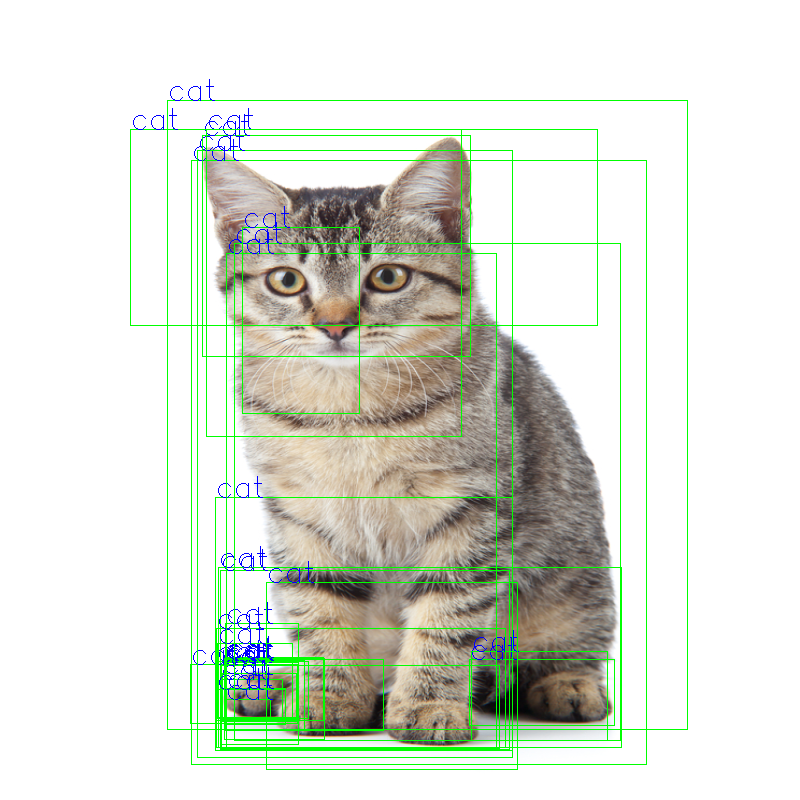

In [ ]:
call('c.png')

In [ ]:
fastrcnn.save_weights('fastrcnn.h5')

In [ ]:
import shutil
shutil.move('fastrcnn.h5','drive/MyDrive/fastrcnn.h5')

'drive/MyDrive/fastrcnn.h5'